### Importing the libraries and functions

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from scipy.stats import iqr

#### Reading and exploring the dataset

In [14]:
data = pd.read_csv('Iris.csv')

In [15]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [16]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Checking for null values

In [163]:
pd.isnull(data).sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Checking all the unique species 

In [17]:
print(data.Species.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### Encoding categorical variable

In [24]:
# Using label encoder to convert the 3 differen categories as 3 different numbers
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [25]:
data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

#### Checking number of samples for each species

In [26]:
data.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

Thus, we have equal representation of all 3 species

In [34]:
data.drop('Id',axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualizing the relationships among the features

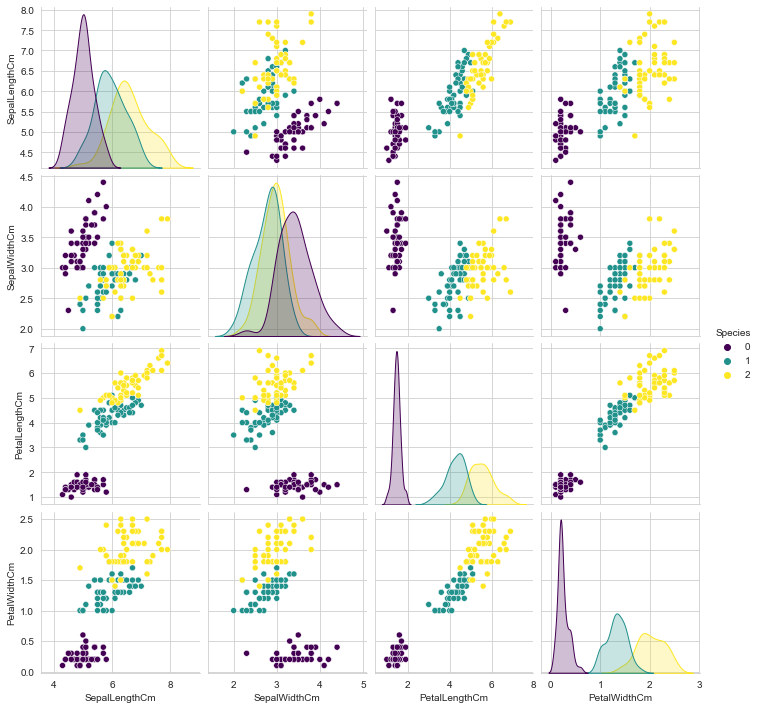

In [113]:
sns.set_style('whitegrid')
sns.pairplot(data, hue = 'Species', palette = 'viridis')

It is clear from these plots that 'Sepal Width' and 'Sepal Length' do not have a predictable boundary corresponding to the species

<AxesSubplot:>

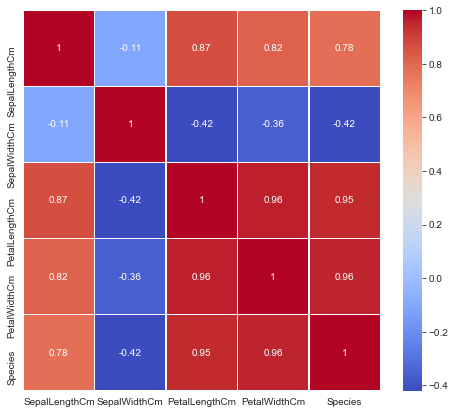

In [45]:
plt.figure(figsize = (8,7))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', linewidths=0.5, linecolor = 'white')

The correlation for 'Sepal width' is negative wrt all other features, implying that it is not a accurate feature for prediction of species 

#### Checking features for outliers

##### Box plots

Text(0.5, 1.0, 'Petal Width')

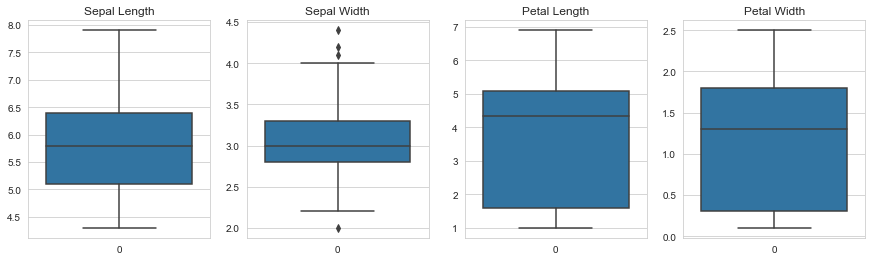

In [71]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

sns.boxplot(ax = axes[0], data = data['SepalLengthCm'])
axes[0].set_title("Sepal Length")
sns.boxplot(ax = axes[1], data = data['SepalWidthCm'])
axes[1].set_title("Sepal Width")
sns.boxplot(ax = axes[2], data = data['PetalLengthCm'])
axes[2].set_title("Petal Length")
sns.boxplot(ax = axes[3], data = data['PetalWidthCm'])
axes[3].set_title("Petal Width")

##### Histplots

Text(0.5, 1.0, 'Petal Width')

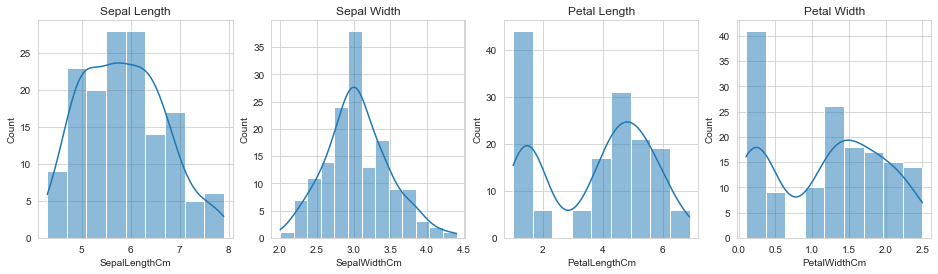

In [81]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

sns.histplot(ax = axes[0], data = data['SepalLengthCm'],kde= True)
axes[0].set_title("Sepal Length")
sns.histplot(ax = axes[1], data = data['SepalWidthCm'],kde= True)
axes[1].set_title("Sepal Width")
sns.histplot(ax = axes[2], data = data['PetalLengthCm'],kde= True)
axes[2].set_title("Petal Length")
sns.histplot(ax = axes[3], data = data['PetalWidthCm'],kde= True)
axes[3].set_title("Petal Width")

We see that the feature 'Sepal Width' has some outliers

In [102]:
# Calculating the inter-quartile range of the Sepal Width column
iq = iqr(data['SepalWidthCm'])
iq

0.5

In [101]:
# Defining the criteria for outliers
lower_lim = data['SepalWidthCm'].quantile(0.25) - 1.5*iq
upper_lim = data['SepalWidthCm'].quantile(0.75) + 1.5*iq
lower_lim, upper_lim

(2.05, 4.05)

In [108]:
# Finding the outliers
data[(data['SepalWidthCm'] < lower_lim) | (data['SepalWidthCm'] > upper_lim)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,0
32,5.2,4.1,1.5,0.1,0
33,5.5,4.2,1.4,0.2,0
60,5.0,2.0,3.5,1.0,1


##### Removing outliers

In [109]:
data_cln = data[(data['SepalWidthCm'] > lower_lim) & (data['SepalWidthCm'] < upper_lim)]
data_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  146 non-null    float64
 1   SepalWidthCm   146 non-null    float64
 2   PetalLengthCm  146 non-null    float64
 3   PetalWidthCm   146 non-null    float64
 4   Species        146 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.3 KB


C:\Users\Siddharth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

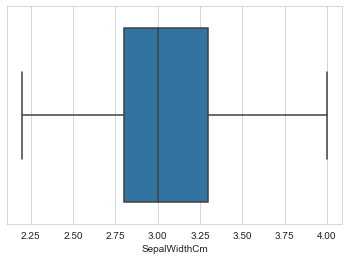

In [110]:
sns.boxplot(data_cln['SepalWidthCm'])

#### Implementing the Decision Tree Classifier

In [116]:
X = data_cln.iloc[:, :-1]
Y = data_cln['Species']

Splitting the data into training and test sets 

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3)

Selecting the best parameters for the classifier

In [136]:
params = {"criterion": ["gini", "entropy"], "max_depth": [1,5,10,50,100,500,1000], 
              "min_samples_split": [3,5,10,100,5000]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), params)
grid_tree.fit(X_train, Y_train)

tree_par = grid_tree.best_estimator_
print(tree_par)


DecisionTreeClassifier(max_depth=5, min_samples_split=3)


Training the model with training data

In [143]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=5, min_samples_split=3)
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)

#### Comparing actual and predicted labels 

In [141]:
res = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
res

,Actual,Predicted
120,2,2
134,2,1
19,0,0
105,2,2
46,0,0
87,1,1
10,0,0
12,0,0
36,0,0
21,0,0


In [162]:
acc = accuracy_score(Y_test, Y_pred)
print("Accuracy score is " + str(acc))

Accuracy score is 0.8863636363636364


#### Confusion Matrix

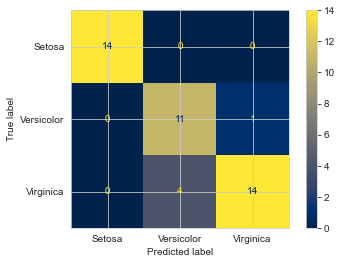

In [148]:
cm = confusion_matrix(Y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Setosa','Versicolor','Virginica'])
cmd.plot(cmap = 'cividis')

### Visualizing the Decision Tree

In [158]:
cols = X.columns.values
plt.figure(figsize = (20,10), dpi = 1000)
plot_tree(dtc, feature_names=cols, filled = True, rounded = True)

[Text(5812.5, 6920.833333333333, 'PetalLengthCm <= 2.45\ngini = 0.665\nsamples = 102\nvalue = [33, 37, 32]'),
 Text(3875.0, 5662.5, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(7750.0, 5662.5, 'PetalLengthCm <= 4.85\ngini = 0.497\nsamples = 69\nvalue = [0, 37, 32]'),
 Text(3875.0, 4404.166666666667, 'SepalLengthCm <= 4.95\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(1937.5, 3145.833333333334, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(5812.5, 3145.833333333334, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(11625.0, 4404.166666666667, 'PetalWidthCm <= 1.7\ngini = 0.114\nsamples = 33\nvalue = [0, 2, 31]'),
 Text(9687.5, 3145.833333333334, 'PetalLengthCm <= 4.95\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(7750.0, 1887.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(11625.0, 1887.5, 'SepalWidthCm <= 2.45\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(9687.5, 629.166666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 T